# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


#Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import plotly.express as px

# Introduction
* Data yang digunakan merupakan data publik salah satu perusahaan e-commerce dari brazil, yang dibuat dari pesanan yang terjadi di Olist Store.
* Dataset memiliki informasi 100k pesanan dari 2016 hingga 2018
* Fiturnya memungkinkan melihat pesanan dari berbagai dimensi yaitu:
  * From order status
  * Price
  * Payment
  * Freight performance to customer location
  * Product attributes
  * Reviews written by customers
* Ini data komersial real/nyata, yang telah dianonimkan,berdasarkan referensi ke perusahaan.

# Customer Segmentation
Jadi pada final project ini saya akan melakukan beberapa hal yaitu:
* Pengelompokan customer berdasarkan RFM analysis.
* Selain itu saya akan melakukan CLV gunakan mendapatkan insight lain dari customer.
* Saya juga menambahkan churn rate untuk mengetahui churn yang terjadi pada customer
* Berdasarkan hasil bimbingan Final Project Saya juga akan melakukan market basket analysis untuk mencocokan produk dengan customer.

#Data Schema

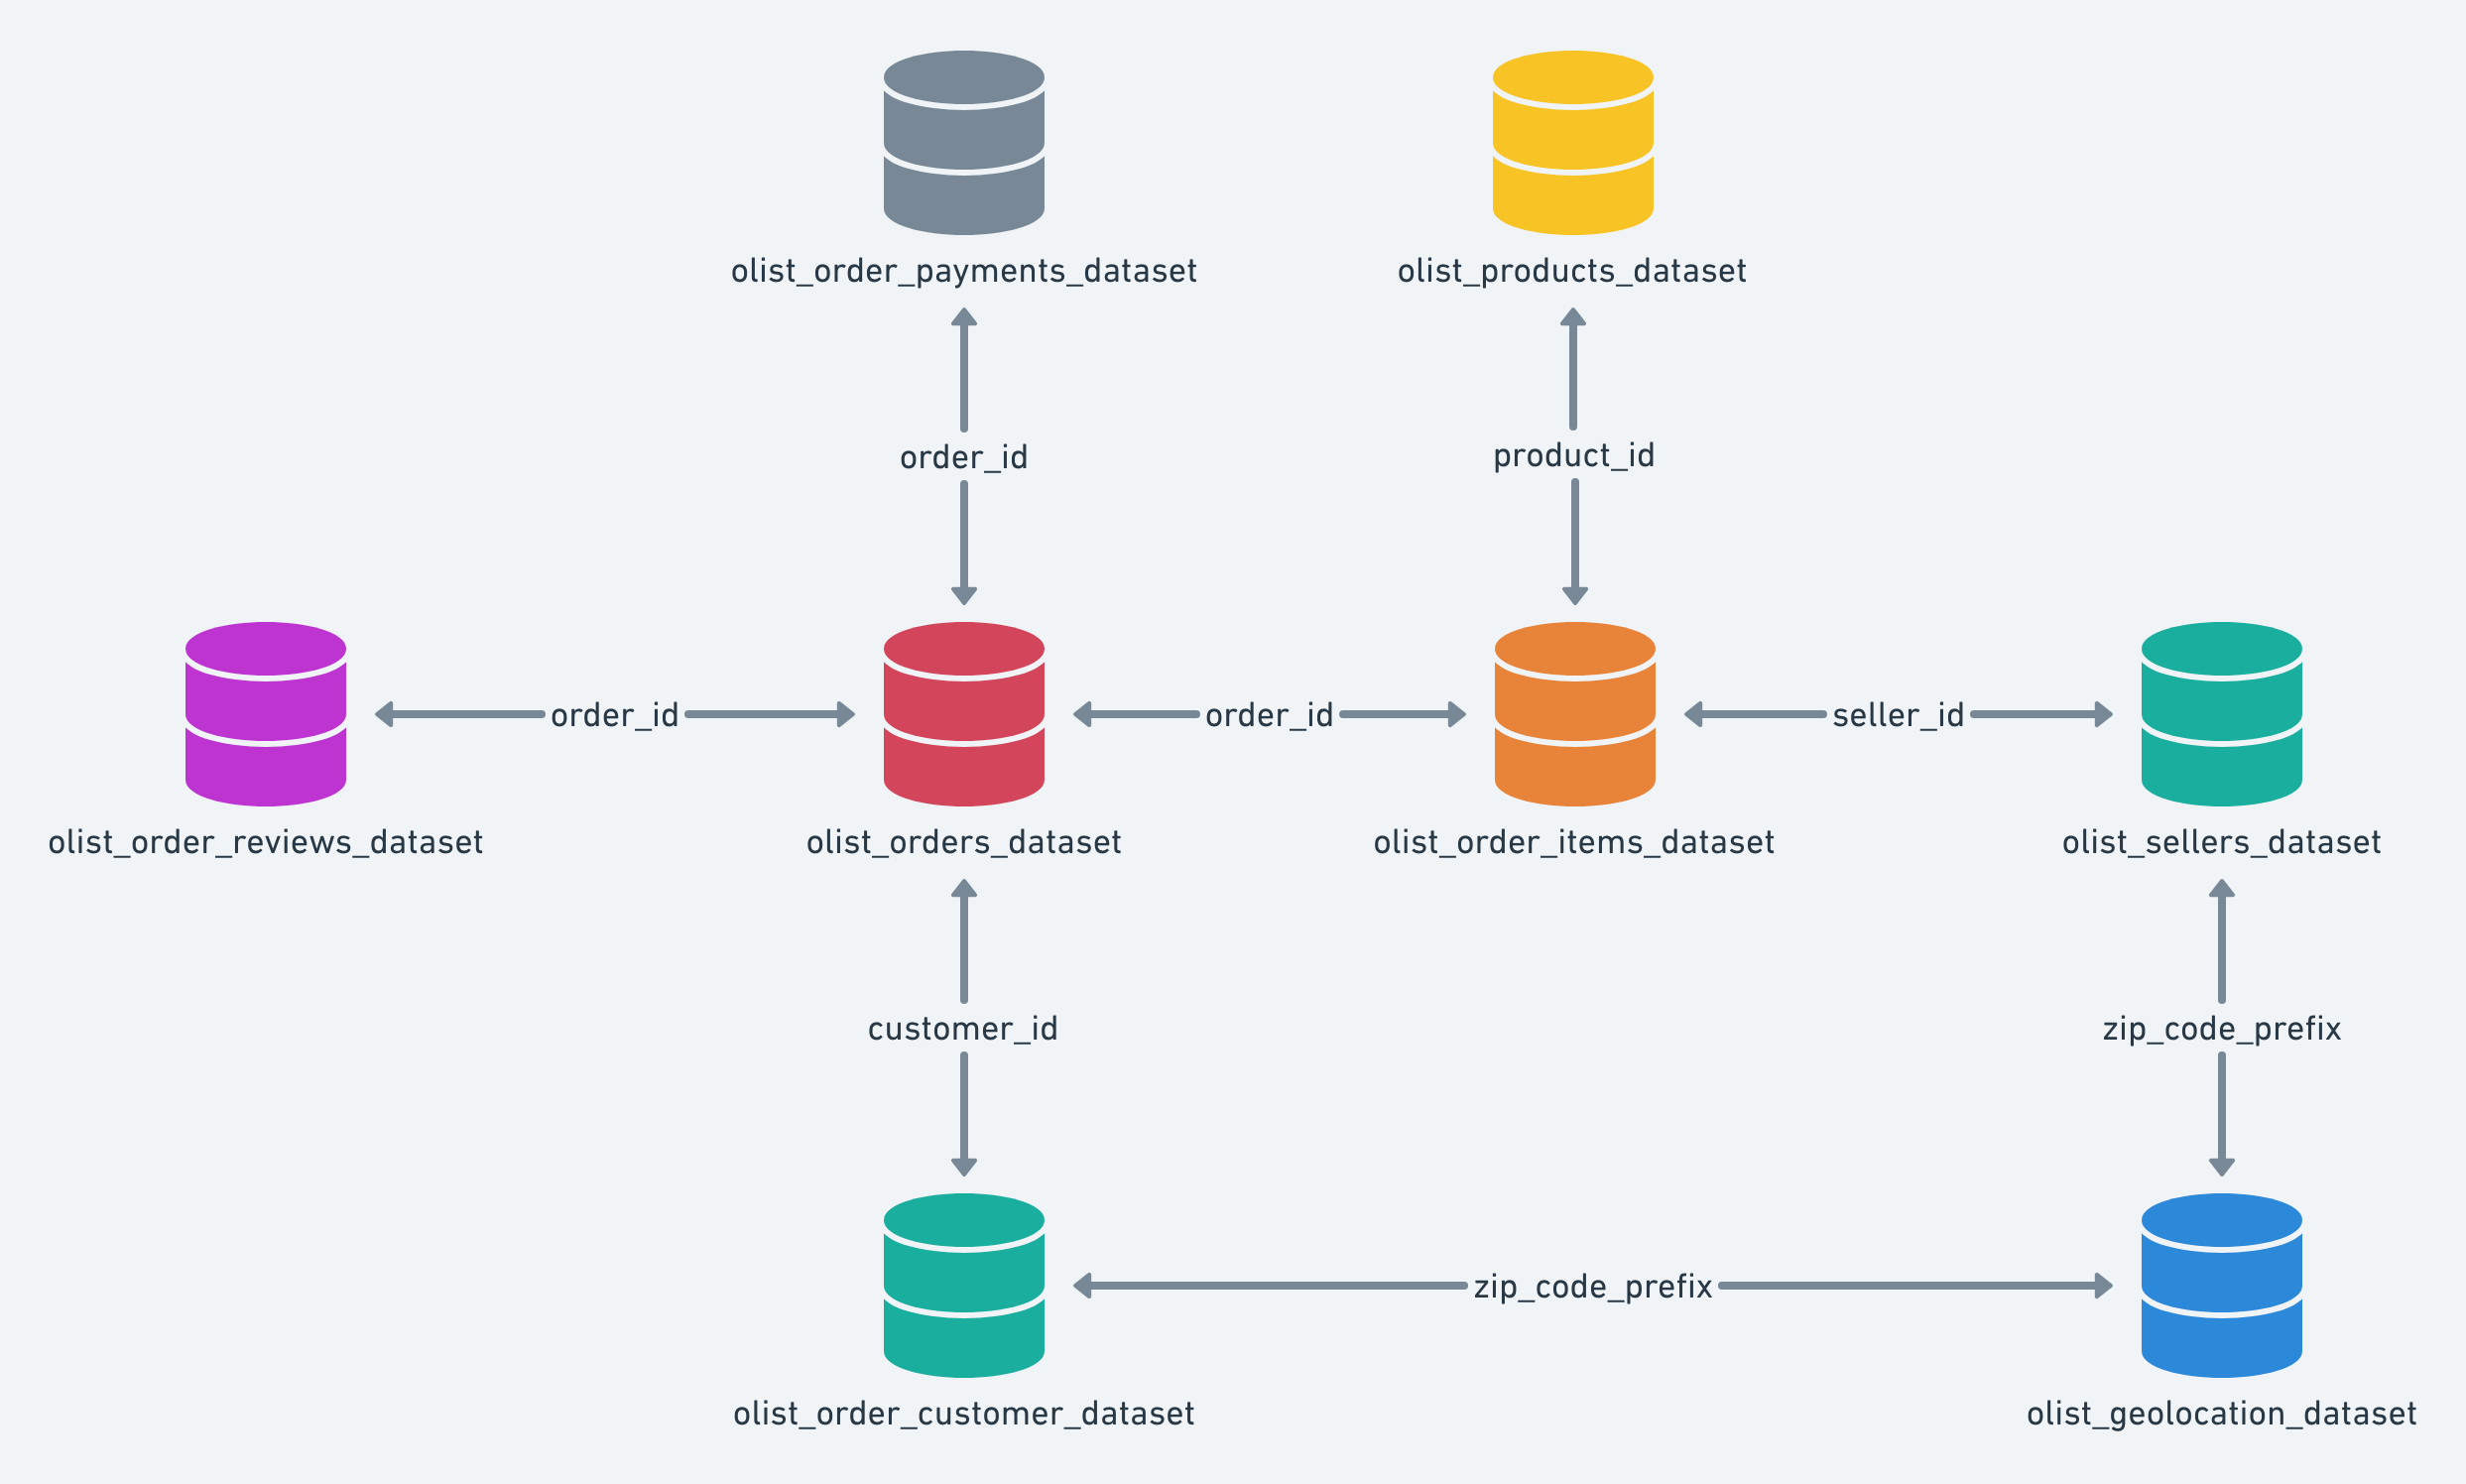

# Membuat dataframe untuk Customer Segmentation

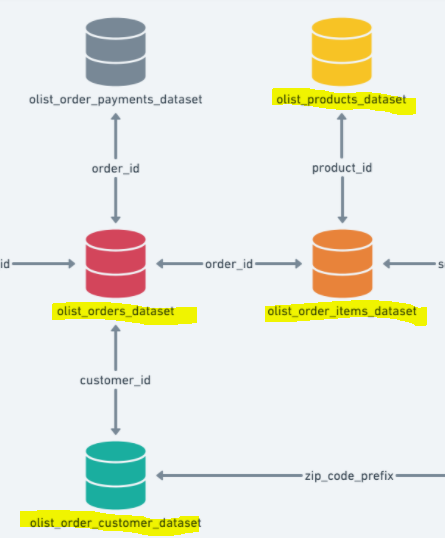

##Mengecek data yang diperlukan untuk diubah menjadi dataset baru

###Data Orderitems


In [ ]:
#data orderitems
df_orderitems = pd.read_csv('Finpro/olist_order_items_dataset.csv',usecols=['order_id','order_item_id','product_id','price'])
df_orderitems.head(5)

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


###Data Order

In [ ]:
#data order
df_order = pd.read_csv('Finpro/olist_orders_dataset.csv',usecols=['order_id','customer_id','order_purchase_timestamp'])
df_order.head(5)

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


###Data Customer

In [ ]:
#data customer
df_customer = pd.read_csv('Finpro/olist_customers_dataset.csv',usecols=['customer_id','customer_state'])
df_customer.head(5)

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP
2,4e7b3e00288586ebd08712fdd0374a03,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP


In [ ]:
df_customer['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

Sumber: [Brazilian State](https://brazil-help.com/brazilian_states.htm)

In [ ]:
def state(x):
    if 'SP' in x:
        return 'Sao Paulo'
    elif 'RJ' in x:
        return 'Rio de Janeiro'
    elif 'MG' in x:
        return 'Minas Gerais'
    elif 'RS' in x:
        return 'Rio Grande do Sul'
    elif 'PR' in x:
        return 'Parana'
    elif 'SC' in x:
        return 'Santa Catarina'
    elif 'BA' in x:
        return 'Bahia'
    elif 'DF' in x:
        return 'Distrito Federal'
    elif 'ES' in x:
        return 'Espírito Santo'
    elif 'GO' in x:
        return 'Goias'
    elif 'PE' in x:
        return 'Pernambuco'
    elif 'CE' in x:
        return 'Ceara'
    elif 'PA' in x:
        return 'Para'
    elif 'MT' in x:
        return 'MatoGrosso'
    elif 'MA' in x:
        return 'Maranhao'
    elif 'MS' in x:
        return 'MatoGrosso do Sul'
    elif 'PB' in x:
        return 'Paraíba'
    elif 'PI' in x:
        return 'Piauí'
    elif 'RN' in x:
        return 'Rio Grande do Norte'
    elif 'AL' in x:
        return 'Alagoas'
    elif 'SE' in x:
        return 'Sergipe'
    elif 'TO' in x:
        return 'Tocantins'
    elif 'RO' in x:
        return 'Rondonia'
    elif 'AM' in x:
        return 'Amazonas'
    elif 'AC' in x:
        return 'Acre'
    elif 'AP' in x:
        return 'Amapa'
    elif 'RR' in x:
        return 'Roraima'
    else:
        return 'others'

df_customer['state'] = df_customer['customer_state'].apply(state)

In [ ]:
df_customer['state'].value_counts()

Sao Paulo              41746
Rio de Janeiro         12852
Minas Gerais           11635
Rio Grande do Sul       5466
Parana                  5045
Santa Catarina          3637
Bahia                   3380
Distrito Federal        2140
Espírito Santo          2033
Goias                   2020
Pernambuco              1652
Ceara                   1336
Para                     975
MatoGrosso               907
Maranhao                 747
MatoGrosso do Sul        715
Paraíba                  536
Piauí                    495
Rio Grande do Norte      485
Alagoas                  413
Sergipe                  350
Tocantins                280
Rondonia                 253
Amazonas                 148
Acre                      81
Amapa                     68
Roraima                   46
Name: state, dtype: int64

In [ ]:
df_customer.head(5)

,customer_id,customer_state,state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,Sao Paulo
1,18955e83d337fd6b2def6b18a428ac77,SP,Sao Paulo
2,4e7b3e00288586ebd08712fdd0374a03,SP,Sao Paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,SP,Sao Paulo
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP,Sao Paulo


###Data Product

In [ ]:
#data product
df_product = pd.read_csv('Finpro/olist_products_dataset.csv',usecols=['product_id','product_category_name'])
df_product.head(5)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [ ]:
df_product['product_category_name'].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

## Menggabungkan data yang diperlukan

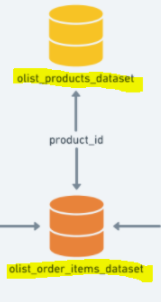

In [ ]:
df=df_orderitems.merge(df_product, how='left', on='product_id')

In [ ]:
df.shape

(112650, 5)

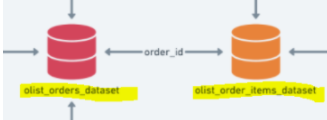

In [ ]:
df=df.merge(df_order, how='left', on='order_id')

In [ ]:
df.shape

(112650, 7)

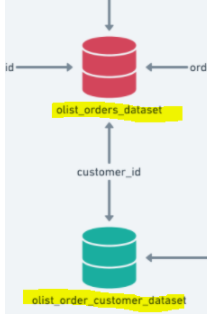

In [ ]:
df=df.merge(df_customer, how='left', on='customer_id')

In [ ]:
df.shape

(112650, 9)

In [ ]:
df

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_purchase_timestamp,customer_state,state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,RJ,Rio de Janeiro
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,SP,Sao Paulo
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,MG,Minas Gerais
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,SP,Sao Paulo
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,SP,Sao Paulo
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,utilidades_domesticas,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,MA,Maranhao
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,informatica_acessorios,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,PR,Parana
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,esporte_lazer,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,SP,Sao Paulo
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,informatica_acessorios,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59,SP,Sao Paulo


#1. Data Exploration
* Tipe Data sudah sesuai
* Terdapat missing value pada **product_category_name**	sebanyak 1603. Saya mengganti nilai NA dengan **others** karena nilai order_id dan product_id nya Not NA.
* Tidak terdapat duplikasi


In [ ]:
df

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_purchase_timestamp,customer_state,state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,RJ,Rio de Janeiro
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,SP,Sao Paulo
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,MG,Minas Gerais
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,SP,Sao Paulo
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,SP,Sao Paulo
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,utilidades_domesticas,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,MA,Maranhao
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,informatica_acessorios,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,PR,Parana
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,esporte_lazer,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,SP,Sao Paulo
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,informatica_acessorios,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59,SP,Sao Paulo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   order_item_id             112650 non-null  int64  
 2   product_id                112650 non-null  object 
 3   price                     112650 non-null  float64
 4   product_category_name     111047 non-null  object 
 5   customer_id               112650 non-null  object 
 6   order_purchase_timestamp  112650 non-null  object 
 7   customer_state            112650 non-null  object 
 8   state                     112650 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.6+ MB


##Handle Missing Values
Order_id dan product id nya tidak missing value, saya akan mengganti nilai NA pada **product_category_name** dengan **others**

In [ ]:
#Handle Missing Values
df.isnull().sum()

order_id                       0
order_item_id                  0
product_id                     0
price                          0
product_category_name       1603
customer_id                    0
order_purchase_timestamp       0
customer_state                 0
state                          0
dtype: int64

In [ ]:
df[(df['order_id'].notna())&
   (df['product_category_name'].isna())]

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_purchase_timestamp,customer_state,state
123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,7.79,NaN,ae55e228ded796581eccc67045516023,2017-09-26 15:24:03,SP,Sao Paulo
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,7.60,NaN,baa4ed05f22ffb6c4a41b71b699a492c,2017-02-13 16:18:07,MG,Minas Gerais
132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,122.99,NaN,a69c820c317aa348d781a9d6732afc23,2018-02-27 12:16:30,MS,MatoGrosso do Sul
142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,20.30,NaN,c664dc5de5b5f4184bc4ca0285b9f8fe,2018-01-18 17:05:30,MT,MatoGrosso
171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,56.00,NaN,97dc92f1aae3a7db8b252d1b8466910e,2018-02-17 14:22:34,DF,Distrito Federal
...,...,...,...,...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,122.99,NaN,442c6e15fe1e8e63a96598607c92bc35,2018-01-26 14:41:14,SC,Santa Catarina
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,39.90,NaN,945c975073e57fe39a636afbf6689bcc,2017-11-11 15:18:16,SP,Sao Paulo
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,139.00,NaN,bb308532dc44f5973cd2caf17d15bd8c,2017-05-03 07:08:50,RJ,Rio de Janeiro
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,49.90,NaN,eb09a9c966e7801d1ab6ccb15baa96ef,2018-02-17 14:46:29,DF,Distrito Federal


In [ ]:
df['product_category_name'].fillna('others', inplace=True)

In [ ]:
df[(df['product_category_name'].isin(["others"]))]

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_purchase_timestamp,customer_state,state,diff
123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,7.79,others,ae55e228ded796581eccc67045516023,2017-09-26 15:24:03,SP,Sao Paulo,341 days 17:42:54
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,7.60,others,baa4ed05f22ffb6c4a41b71b699a492c,2017-02-13 16:18:07,MG,Minas Gerais,566 days 16:48:50
132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,122.99,others,a69c820c317aa348d781a9d6732afc23,2018-02-27 12:16:30,MS,MatoGrosso do Sul,187 days 20:50:27
142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,20.30,others,c664dc5de5b5f4184bc4ca0285b9f8fe,2018-01-18 17:05:30,MT,MatoGrosso,227 days 16:01:27
171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,56.00,others,97dc92f1aae3a7db8b252d1b8466910e,2018-02-17 14:22:34,DF,Distrito Federal,197 days 18:44:23
...,...,...,...,...,...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,122.99,others,442c6e15fe1e8e63a96598607c92bc35,2018-01-26 14:41:14,SC,Santa Catarina,219 days 18:25:43
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,39.90,others,945c975073e57fe39a636afbf6689bcc,2017-11-11 15:18:16,SP,Sao Paulo,295 days 17:48:41
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,139.00,others,bb308532dc44f5973cd2caf17d15bd8c,2017-05-03 07:08:50,RJ,Rio de Janeiro,488 days 01:58:07
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,49.90,others,eb09a9c966e7801d1ab6ccb15baa96ef,2018-02-17 14:46:29,DF,Distrito Federal,197 days 18:20:28


In [ ]:
df.isnull().sum()

order_id                    0
order_item_id               0
product_id                  0
price                       0
product_category_name       0
customer_id                 0
order_purchase_timestamp    0
customer_state              0
state                       0
dtype: int64

##Handle Duplicated Rows

In [ ]:
#Handle Duplicated Rows
df.duplicated().sum()

0

In [ ]:
#Handle Duplicated Rows
df[df.duplicated()]

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_purchase_timestamp,customer_state,state


In [ ]:
df

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_purchase_timestamp,customer_state,state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,RJ,Rio de Janeiro
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,SP,Sao Paulo
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,MG,Minas Gerais
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,SP,Sao Paulo
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,SP,Sao Paulo
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,utilidades_domesticas,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,MA,Maranhao
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,informatica_acessorios,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,PR,Parana
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,esporte_lazer,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,SP,Sao Paulo
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,informatica_acessorios,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59,SP,Sao Paulo


## Distribution Price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



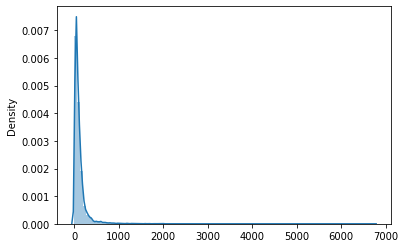

In [ ]:
#Price
sns.distplot(x=df['price'],hist=True,bins=100)

In [ ]:
plt.figure(figsize=(15,15))
fig=  px.bar(x=df['rfm_level', y='Jumlah_Customer',
              labels={
                     "Jumlah_Customer": "Jumlah Customer",
                     "rfm_level": "RFM Level"
                 },
              title={
                    'text': "Jumlah Customer Berdasarkan RFM Level",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'})
fig.show()

# Mencari Insight dari Customer

## [About RFM (Recency, Frequency, Monetary)](https://medium.com/@ogunbajoadeyinka/building-an-rfm-model-in-python-3481112a2816)
* Model pemasaran untuk segmentasi pelanggan berbasis perilaku. Dengan mengelompokkan pelanggan berdasarkan riwayat transaksi mereka:
  1. Seberapa baru
  2. Seberapa sering
  3. Berapa banyak yang mereka beli

## Analisis RFM (Recency, Frequency, Monetary)

### Recency

In [ ]:
max_date = max(df['order_purchase_timestamp'])
max_date

'2018-09-03 09:06:57'

In [ ]:
#Konversi date
max_date = pd.to_datetime(max_date)
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [ ]:
# compute the diff
df['diff'] = max_date - df['order_purchase_timestamp']
df.head()

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_purchase_timestamp,customer_state,state,diff
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,RJ,Rio de Janeiro,355 days 00:07:55
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,SP,Sao Paulo,494 days 22:13:51
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,MG,Minas Gerais,231 days 18:33:26
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,SP,Sao Paulo,25 days 23:06:22
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,SP,Sao Paulo,575 days 19:09:06


In [ ]:
#Recency
recency = df.groupby('customer_id')['diff'].min()
recency = recency.reset_index()
recency.columns = ['CustomerID', 'recency']
recency.head()

,CustomerID,recency
0,00012a2ce6f8dcda20d059ce98491703,292 days 16:58:31
1,000161a058600d5901f007fab4c27140,413 days 23:26:25
2,0001fd6190edaaf884bcaf3d49edf079,551 days 22:00:14
3,0002414f95344307404f0ace7a26f1d5,382 days 19:57:37
4,000379cdec625522490c315e70c7a9fb,153 days 19:24:40


In [ ]:
recency.sort_values(by="recency")

,CustomerID,recency
29063,4b7decb9b58e2569548b8b4c8e20e8d7,0 days 00:00:00
52937,898b7fee99c4e42170ab69ba59be0a8b,4 days 18:06:20
28259,496630b6740bcca28fce9ba50d8a26ef,4 days 18:14:57
42327,6e353700bc7bcdf6ebc15d6de16d7002,4 days 18:48:29
88844,e60df9449653a95af4549bbfcb18a6eb,4 days 18:48:34
...,...,...
20560,355077684019f7f60a031656bd7262b8,699 days 23:22:07
68438,b106b360fe2ef8849fbbd056f777b4d5,700 days 10:59:05
51900,86dc2ffce2dfff336de2f386a786e574,717 days 20:50:19
40006,683c54fc24d40ee9f8a6fc179fd9856c,728 days 08:51:23


###Frequency

In [ ]:
df[(df['order_item_id'].isin([1]))&
   (df['product_category_name'].isin(['ferramentas_jardim']))&
   df['product_id'].isin(['ac6c3623068f30de03045865e4e10089'])]

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_purchase_timestamp,customer_state,state,diff
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.9,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,SP,Sao Paulo,575 days 19:09:06
3483,07e2a9d486a8394f2700230396e8d5f0,1,ac6c3623068f30de03045865e4e10089,209.9,ferramentas_jardim,0d0a49286a8610cff0b0ca481ac5d14b,2018-02-17 22:29:16,MA,Maranhao,197 days 10:37:41
19567,2ceb6637c42b2ccc41b9949f731f995f,1,ac6c3623068f30de03045865e4e10089,199.9,ferramentas_jardim,d5c3c53a147864a64bc701b14879753f,2017-05-20 19:07:02,MG,Minas Gerais,470 days 13:59:55
25467,39ecbda0a90495a26efaaef708ba97c8,1,ac6c3623068f30de03045865e4e10089,199.9,ferramentas_jardim,a7b7df5662c05961c2610ba95c593154,2018-01-17 19:39:03,SP,Sao Paulo,228 days 13:27:54
33112,4b0c84473bd3be3ee00dba465265e79d,1,ac6c3623068f30de03045865e4e10089,209.9,ferramentas_jardim,e9480985d1c0e64ea0754e6aa4e78566,2018-02-14 13:34:53,RS,Rio Grande do Sul,200 days 19:32:04
37927,560459df3c765b876f92c018e728b978,1,ac6c3623068f30de03045865e4e10089,199.9,ferramentas_jardim,e306c9b9d7ff9cb8ff5da5c98e036fae,2017-05-18 21:31:37,SC,Santa Catarina,472 days 11:35:20
54366,7b8ef69133bb95128e53e14329bdb03a,1,ac6c3623068f30de03045865e4e10089,199.9,ferramentas_jardim,a347b5c92e4dfc932d041067f2f48fce,2017-12-19 20:48:05,SP,Sao Paulo,257 days 12:18:52
74614,a9f79500e239f331c724ae1fc5543bf5,1,ac6c3623068f30de03045865e4e10089,209.9,ferramentas_jardim,78a6b9486f068ed66115b05fe58b2b57,2018-03-10 21:24:16,SP,Sao Paulo,176 days 11:42:41
78639,b2e54b3ccbc9c423893aa9dbe19dcd73,1,ac6c3623068f30de03045865e4e10089,199.9,ferramentas_jardim,550fc4a83290572e965f77f8c53913b4,2017-05-04 09:48:47,RJ,Rio de Janeiro,486 days 23:18:10
84081,beffe64d2172f01e39f8c776eb5862b0,1,ac6c3623068f30de03045865e4e10089,199.9,ferramentas_jardim,086a836b41203d3668bb1f312451932c,2017-08-22 14:47:32,RJ,Rio de Janeiro,376 days 18:19:25


In [ ]:
#Frequency
frequency =df.groupby("customer_id")["order_id"].count()
frequency =frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


In [ ]:
frequency.sort_values(by="frequency",ascending=False)

,CustomerID,frequency
97220,fc3d1daec319d62d49bfb5e1f83123e9,21
73568,be1b70680b9f9694d8c70f41fa3dc92b,20
73311,bd5d39761aa56689a265d95d8d32b8be,20
67106,adb32467ecc74b53576d9d13a5a55891,15
6456,10de381f8a8d23fff822753305f71cae,15
...,...,...
34607,5a1739996fb7a15067fa38c3a0a1097e,1
34605,5a15f2faee1402a7a587641c107b5e10,1
34604,5a158dfc1554dd2b4fe7f3c2581993bd,1
34603,5a1523d32a6d1b323a05895f5164655d,1


###Monetary

In [ ]:
monetary=df.groupby("customer_id")["price"].sum()
monetary=monetary.reset_index()
monetary.columns=["CustomerID","monetary"]
monetary.head()

,CustomerID,monetary
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00


In [ ]:
monetary.sort_values(by="monetary",ascending=False)

,CustomerID,monetary
8475,1617b1357756262bfa56ab541c47bc16,13440.00
91284,ec5b2ba62e574342386871631fafd3fc,7160.00
76948,c6e2731c5b391845f6800c97401a43a9,6735.00
94398,f48d464a0baaea338cb25f816991ab1f,6729.00
24603,3fd6777bbce08a352fddd04e4a7cc8f6,6499.00
...,...,...
81496,d2c63ad286e3ca9dd69218008d61ff81,2.90
9383,184e8e8e48937145eb96c721ef1f0747,2.29
64612,a790343ca6f3fee08112d678b43aa7c5,2.20
8483,161b6d415e8b3413c6609c70cf405b5a,0.85


### Result of RFM

In [ ]:
# merge
rfm = pd.merge(recency, frequency, on='CustomerID', how='inner')
rfm = pd.merge(rfm, monetary, on='CustomerID', how='inner')
rfm.head()

,CustomerID,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,292 days 16:58:31,1,89.80
1,000161a058600d5901f007fab4c27140,413 days 23:26:25,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,551 days 22:00:14,1,179.99
3,0002414f95344307404f0ace7a26f1d5,382 days 19:57:37,1,149.90
4,000379cdec625522490c315e70c7a9fb,153 days 19:24:40,1,93.00


In [ ]:
# number of days only
rfm['recency'] = rfm['recency'].dt.days
rfm.head()

,CustomerID,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80
1,000161a058600d5901f007fab4c27140,413,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90
4,000379cdec625522490c315e70c7a9fb,153,1,93.00


In [ ]:
#Customer yang baru saja membeli produk di olist
rfm.sort_values(by='recency',ascending=True)

,CustomerID,recency,frequency,monetary
29063,4b7decb9b58e2569548b8b4c8e20e8d7,0,1,145.00
28259,496630b6740bcca28fce9ba50d8a26ef,4,1,24.90
88158,e450a297a7bc6839ceb0cf1a2377fa02,4,1,63.90
6357,10a79ef2783cae3d8d678e85fde235ac,4,1,6.90
52937,898b7fee99c4e42170ab69ba59be0a8b,4,1,84.99
...,...,...,...,...
89226,e6f959bf384d1d53b6d68826699bba12,699,1,128.90
68438,b106b360fe2ef8849fbbd056f777b4d5,700,1,100.00
51900,86dc2ffce2dfff336de2f386a786e574,717,3,134.97
3329,08c5351a6aca1c1589a38f244edeee9d,728,2,72.89


In [ ]:
#Customer yang sering membeli produk di olist
rfm.sort_values(by='frequency',ascending=False)

,CustomerID,recency,frequency,monetary
97220,fc3d1daec319d62d49bfb5e1f83123e9,413,21,31.80
73568,be1b70680b9f9694d8c70f41fa3dc92b,192,20,2000.00
73311,bd5d39761aa56689a265d95d8d32b8be,375,20,1974.00
67106,adb32467ecc74b53576d9d13a5a55891,580,15,765.00
6456,10de381f8a8d23fff822753305f71cae,283,15,982.35
...,...,...,...,...
34607,5a1739996fb7a15067fa38c3a0a1097e,551,1,35.00
34605,5a15f2faee1402a7a587641c107b5e10,154,1,59.90
34604,5a158dfc1554dd2b4fe7f3c2581993bd,134,1,79.00
34603,5a1523d32a6d1b323a05895f5164655d,349,1,29.90


In [ ]:
#MCustomer yang paling memberikan pendapatan Terbanyak
rfm.sort_values(by='monetary',ascending=False)

,CustomerID,recency,frequency,monetary
8475,1617b1357756262bfa56ab541c47bc16,338,8,13440.00
91284,ec5b2ba62e574342386871631fafd3fc,49,4,7160.00
76948,c6e2731c5b391845f6800c97401a43a9,567,1,6735.00
94398,f48d464a0baaea338cb25f816991ab1f,39,1,6729.00
24603,3fd6777bbce08a352fddd04e4a7cc8f6,466,1,6499.00
...,...,...,...,...
81496,d2c63ad286e3ca9dd69218008d61ff81,605,1,2.90
9383,184e8e8e48937145eb96c721ef1f0747,354,1,2.29
64612,a790343ca6f3fee08112d678b43aa7c5,8,1,2.20
8483,161b6d415e8b3413c6609c70cf405b5a,131,1,0.85


### Visualisasi RFM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



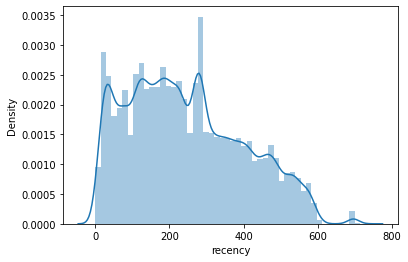

In [ ]:
#distribusi plot recency
sns.distplot(rfm['recency'])

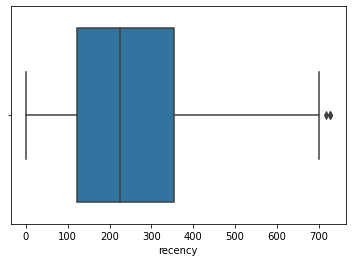

In [ ]:
sns.boxplot(x='recency', data=rfm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



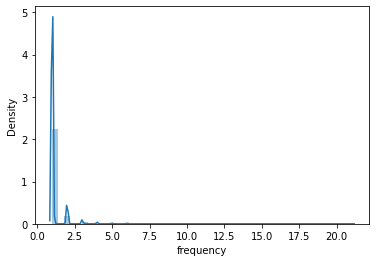

In [ ]:
#distribusi plot frequency
sns.distplot(rfm['frequency'])

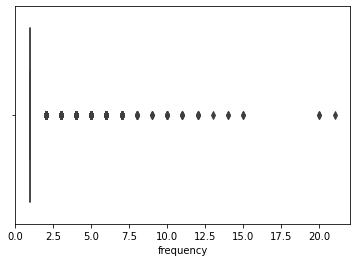

In [ ]:
sns.boxplot(x='frequency', data=rfm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



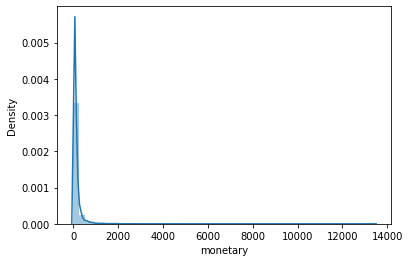

In [ ]:
#distribusi plot monetary
sns.distplot(rfm['monetary'])

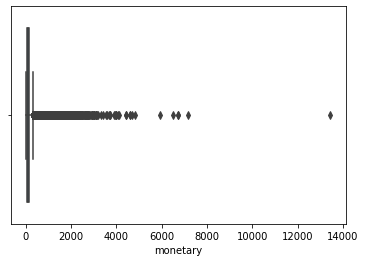

In [ ]:
sns.boxplot(x='monetary', data=rfm)

## Membuat Pengelompokan Customer Berdasarkan RFM Analysis


In [ ]:
rfm.describe()

,recency,frequency,monetary
count,98666.000000,98666.000000,98666.000000
mean,244.815803,1.141731,137.754076
std,153.392909,0.538452,210.645145
min,0.000000,1.000000,0.850000
25%,121.000000,1.000000,45.900000
50%,226.000000,1.000000,86.900000
75%,355.000000,1.000000,149.900000
max,728.000000,21.000000,13440.000000


### Membuat Standarisasi Skor/Rating RFM dari Customer

In [ ]:
#recency rating dari 1-4
r1=rfm['recency'].max()
r2=rfm['recency'].quantile(0.75)
r3=rfm['recency'].quantile(0.50)
r4=rfm['recency'].quantile(0.25)

#frequency rating dari 1-4
f1=rfm['frequency'].quantile(0.25)
f2=f1+f1
f3=f2+f2
f4=f3+f3

#monetary rating dari 1-4
m1=rfm['monetary'].min()
m2=rfm['monetary'].quantile(0.25)
m3=rfm['monetary'].quantile(0.50)
m4=rfm['monetary'].quantile(0.75)

print("recency")
print("================")
print("Rating 1 ",r1)
print("Rating 2 ",r2)
print("Rating 3 ",r3)
print("Rating 4 ",r4)
print("")
print("frequency")
print("================")
print("Rating 1 ",f1)
print("Rating 2 ",f2)
print("Rating 3 ",f3)
print("Rating 4 ",f4)
print("")
print("monetary")
print("================")
print("Rating 1 ",m1)
print("Rating 2 ",m2)
print("Rating 3 ",m3)
print("Rating 4 ",m4)

recency
Rating 1  728
Rating 2  355.0
Rating 3  226.0
Rating 4  121.0

frequency
Rating 1  1.0
Rating 2  2.0
Rating 3  4.0
Rating 4  8.0

monetary
Rating 1  0.85
Rating 2  45.9
Rating 3  86.9
Rating 4  149.9


#### Recency

In [ ]:
def skor_r(x):
    if x <= r4:
        return 4
    elif x>r4 and x<=r3:
        return 3
    elif x>r3 and x<=r2:
        return 2
    else:
        return 1

rfm['r'] = rfm['recency'].apply(lambda x: skor_r(x))

In [ ]:
rfm[(rfm['recency']<=r1)]

,CustomerID,recency,frequency,monetary,r
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2
1,000161a058600d5901f007fab4c27140,413,1,54.90,1
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,1
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,3
...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00,3
98662,fffecc9f79fd8c764f843e9951b11341,157,1,54.90,3
98663,fffeda5b6d849fbd39689bb92087f431,103,1,47.90,4
98664,ffff42319e9b2d713724ae527742af25,81,1,199.90,4


#### Frequency

In [ ]:
def skor_f(x):
    if x >= f4:
        return 4
    elif x<f4 and x>=f3:
        return 3
    elif x<f3 and x>=f2:
        return 2
    else:
        return 1

rfm['f'] = rfm['frequency'].apply(lambda x: skor_f(x))

In [ ]:
rfm[(rfm['frequency']>=f4)]

,CustomerID,recency,frequency,monetary,r,f
4772,0c792d32a3251b4f69dae8646dfbedbc,302,8,1559.92,2,4
5162,0d861a5e4dd6a9079d89e1330848f0ab,22,10,1138.30,4,4
5187,0d93f21f3e8543a9d0d8ece01561f5b2,328,12,248.40,2,4
6456,10de381f8a8d23fff822753305f71cae,283,15,982.35,2,4
8475,1617b1357756262bfa56ab541c47bc16,338,8,13440.00,2,4
12307,1ff773612ab8934db89fd5afa8afe506,136,10,2849.90,3,4
12637,20c93357daf05d1c3a092be59aea2c2b,142,8,342.20,3,4
22924,3b54b5978e9ace64a63f90d176ffb158,112,12,213.84,4,4
28579,4a38bf3ad3990d95c2c132f5bf530b95,279,8,452.98,2,4
28645,4a60b2ce1ee8c7b828e4bbcca5b86b41,355,10,1379.00,2,4


#### Monetary

In [ ]:
def skor_m(x):
    if x >= m4:
        return 4
    elif x<m4 and x>=m3:
        return 3
    elif x<m3 and x>=m2:
        return 2
    else:
        return 1

rfm['m'] = rfm['monetary'].apply(lambda x: skor_m(x))

In [ ]:
rfm[(rfm['monetary']>=m4)]

,CustomerID,recency,frequency,monetary,r,f,m
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,4
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,1,1,4
9,000598caf2ef4117407665ac33275130,22,1,1107.00,4,1,4
12,00066ccbe787a588c52bd5ff404590e3,208,4,199.60,3,3,4
14,0009a69b72033b2d0ec8c69fc70ef768,492,1,159.90,1,1,4
...,...,...,...,...,...,...,...
98631,ffe74a03e68b1c23d2bd6a1ecdc2f3d7,417,1,153.78,1,1,4
98645,fff25ab9d3c9ba6ad8119576f285a3d9,486,1,199.00,1,1,4
98655,fff7466a253c0e59499ea943462c10f9,200,1,152.99,3,1,4
98658,fff93c1da78dafaaa304ff032abc6205,82,3,198.89,4,2,4


### Membuat Segmentasi RFM dan Total dari Customer

In [ ]:
rfm

,CustomerID,recency,frequency,monetary,r,f,m
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,4
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,1,1,4
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,3,1,3
...,...,...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00,3,1,2
98662,fffecc9f79fd8c764f843e9951b11341,157,1,54.90,3,1,2
98663,fffeda5b6d849fbd39689bb92087f431,103,1,47.90,4,1,2
98664,ffff42319e9b2d713724ae527742af25,81,1,199.90,4,1,4


In [ ]:
#Segmentasi RFM dengan concat
def join_rfm(x): return str(x['r']) + str(x['f']) + str(x['m'])
rfm['rfm_segment_concat'] = rfm.apply(join_rfm, axis=1)
rfm.head()

,CustomerID,recency,frequency,monetary,r,f,m,rfm_segment_concat
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3,213
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2,112
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,4,114
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,1,1,4,114
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,3,1,3,313


In [ ]:
#Total RFM Skor
def sum_rfm(x): return x['r'] + x['f'] + x['m']
rfm['rfm_score'] = rfm.apply(sum_rfm, axis=1)
rfm.head()

,CustomerID,recency,frequency,monetary,r,f,m,rfm_segment_concat,rfm_score
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3,213,6
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2,112,4
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,4,114,6
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,1,1,4,114,6
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,3,1,3,313,7


### Membuat RFM Level

In [ ]:
rfm.describe()

,recency,frequency,monetary,r,f,m,rfm_score
count,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000
mean,244.815803,1.141731,137.754076,2.504926,1.109501,2.509669,6.124095
std,153.392909,0.538452,210.645145,1.118110,0.344285,1.121284,1.664376
min,0.000000,1.000000,0.850000,1.000000,1.000000,1.000000,3.000000
25%,121.000000,1.000000,45.900000,2.000000,1.000000,2.000000,5.000000
50%,226.000000,1.000000,86.900000,3.000000,1.000000,3.000000,6.000000
75%,355.000000,1.000000,149.900000,4.000000,1.000000,4.000000,7.000000
max,728.000000,21.000000,13440.000000,4.000000,4.000000,4.000000,12.000000


In [ ]:
def rfm_level(x):
    if x >= 9:
        return 'Can\'t Loose Them'
    elif x >= 8 and x < 9:
        return 'Champions'
    elif x >= 7 and x < 8:
        return 'Loyal/Commited'
    elif x >= 6 and x < 7:
        return 'Potential'
    elif x >= 5 and x < 6:
        return 'Promising'
    elif x >= 4 and x < 5:
        return 'Requires Attention'
    else:
        return 'Demands Activation'

rfm['rfm_level'] = rfm['rfm_score'].apply(lambda x: rfm_level(x))
rfm

,CustomerID,recency,frequency,monetary,r,f,m,rfm_segment_concat,rfm_score,rfm_level
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3,213,6,Potential
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2,112,4,Requires Attention
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,4,114,6,Potential
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,1,1,4,114,6,Potential
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,3,1,3,313,7,Loyal/Commited
...,...,...,...,...,...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00,3,1,2,312,6,Potential
98662,fffecc9f79fd8c764f843e9951b11341,157,1,54.90,3,1,2,312,6,Potential
98663,fffeda5b6d849fbd39689bb92087f431,103,1,47.90,4,1,2,412,7,Loyal/Commited
98664,ffff42319e9b2d713724ae527742af25,81,1,199.90,4,1,4,414,9,Can't Loose Them


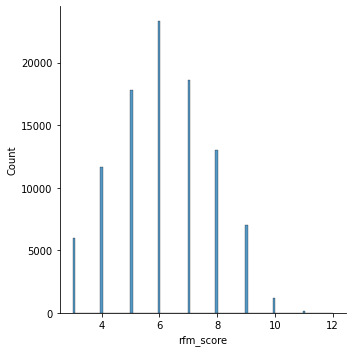

In [ ]:
sns.displot(data=rfm,x="rfm_score")

## Insight from RFM

In [ ]:
rfm

,CustomerID,recency,frequency,monetary,r,f,m,rfm_segment_concat,rfm_score,rfm_level
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3,213,6,Potential
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2,112,4,Requires Attention
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,4,114,6,Potential
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,1,1,4,114,6,Potential
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,3,1,3,313,7,Loyal/Commited
...,...,...,...,...,...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00,3,1,2,312,6,Potential
98662,fffecc9f79fd8c764f843e9951b11341,157,1,54.90,3,1,2,312,6,Potential
98663,fffeda5b6d849fbd39689bb92087f431,103,1,47.90,4,1,2,412,7,Loyal/Commited
98664,ffff42319e9b2d713724ae527742af25,81,1,199.90,4,1,4,414,9,Can't Loose Them


In [ ]:
plot_rfm_level=rfm.groupby('rfm_level').agg(Jumlah_Customer=('rfm_level', 'count')).reset_index()
plot_rfm_level

,rfm_level,Jumlah_Customer
0,Can't Loose Them,8361
1,Champions,12975
2,Demands Activation,5972
3,Loyal/Commited,18636
4,Potential,23321
5,Promising,17771
6,Requires Attention,11630


In [ ]:
def rank(x):
    if "Can't Loose Them" in x:
        return 1
    elif "Champions" in x:
        return 2
    elif "Loyal/Commited" in x:
        return 3
    elif "Potential" in x:
        return 4
    elif "Promising" in x:
        return 5
    elif "Requires Attention" in x:
        return 6
    else:
        return 7

plot_rfm_level['rank'] = plot_rfm_level['rfm_level'].apply(lambda x: rank(x))
plot_rfm_level=plot_rfm_level.sort_values(by="rank")
plot_rfm_level

,rfm_level,Jumlah_Customer,rank
0,Can't Loose Them,8361,1
1,Champions,12975,2
3,Loyal/Commited,18636,3
4,Potential,23321,4
5,Promising,17771,5
6,Requires Attention,11630,6
2,Demands Activation,5972,7


In [ ]:
def score(x):
    if x==1:
        return ">=9"
    elif x==2:
        return "8"
    elif x==3:
        return "7"
    elif x==4:
        return "6"
    elif x==5:
        return "5"
    elif x==6:
        return "4"
    else:
        return "<=3"

plot_rfm_level['score'] = plot_rfm_level['rank'].apply(lambda x: score(x))
plot_rfm_level

,rfm_level,Jumlah_Customer,rank,score
0,Can't Loose Them,8361,1,>=9
1,Champions,12975,2,8
3,Loyal/Commited,18636,3,7
4,Potential,23321,4,6
5,Promising,17771,5,5
6,Requires Attention,11630,6,4
2,Demands Activation,5972,7,<=3


In [ ]:
plt.figure(figsize=(15,15))
fig=  px.bar(plot_rfm_level, x='rfm_level', y='Jumlah_Customer',
              labels={
                     "Jumlah_Customer": "Jumlah Customer",
                     "rfm_level": "RFM Level"
                 },
              title={
                    'text': "Jumlah Customer Berdasarkan RFM Level",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'})
fig.show()

<Figure size 1080x1080 with 0 Axes>

* **Can't Loose Them**: Customer yang memiliki rfm score diatas 9
  * Jumlah Customer yang ada dikelompok ini adalah 8361 customer
* **Champions**: Customer yang memiliki rfm score 8
  * Jumlah Customer yang ada dikelompok ini adalah 12.975 customer
* **Loyal/Commited**: Customer yang memiliki rfm score 7
  * Jumlah Customer yang ada dikelompok ini adalah 18.636 customer
* **Potential**: Customer yang memiliki rfm score 6
  * Jumlah Customer yang ada dikelompok ini adalah 23.321 customer
* **Promising**: Customer yang memiliki rfm score 5
  * Jumlah Customer yang ada dikelompok ini adalah 17.771 customer
* **Requires Attention**: Customer yang memiliki rfm score 4
  * Jumlah Customer yang ada dikelompok ini adalah 11.630 customer
* **Demands Activation**: Customer yang memiliki rfm dibawah 3
  * Jumlah Customer yang ada dikelompok ini adalah 5972 Customer

In [ ]:
#Describe Kelompok Customer cant_loose
cant_loose=rfm[(rfm["rfm_level"].isin(["Can't Loose Them"]))]
cant_loose.describe()

,recency,frequency,monetary,r,f,m,rfm_score
count,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000
mean,84.949886,1.662122,331.320572,3.817366,1.451740,3.912929,9.182036
std,59.114735,1.248084,378.937948,0.438860,0.643776,0.290728,0.437881
min,4.000000,1.000000,47.400000,1.000000,1.000000,2.000000,9.000000
25%,39.000000,1.000000,169.990000,4.000000,1.000000,4.000000,9.000000
50%,76.000000,1.000000,219.900000,4.000000,1.000000,4.000000,9.000000
75%,112.000000,2.000000,341.790000,4.000000,2.000000,4.000000,9.000000
max,580.000000,20.000000,13440.000000,4.000000,4.000000,4.000000,12.000000


In [ ]:
#Describe Kelompok Customer champion
champion=rfm[(rfm["rfm_level"].isin(["Champions"]))]
champion.describe()

,recency,frequency,monetary,r,f,m,rfm_score
count,12975.000000,12975.000000,12975.000000,12975.000000,12975.000000,12975.000000,12975.0
mean,134.616724,1.240771,216.717081,3.360617,1.188902,3.450482,8.0
std,83.964791,0.629048,232.501320,0.669289,0.431173,0.569776,0.0
min,0.000000,1.000000,17.500000,1.000000,1.000000,1.000000,8.0
25%,69.000000,1.000000,110.000000,3.000000,1.000000,3.000000,8.0
50%,131.000000,1.000000,148.900000,3.000000,1.000000,3.000000,8.0
75%,186.000000,1.000000,219.900000,4.000000,1.000000,4.000000,8.0
max,698.000000,7.000000,4099.990000,4.000000,3.000000,4.000000,8.0


In [ ]:
#Describe Kelompok Customer loyal
loyal=rfm[(rfm["rfm_level"].isin(["Loyal/Commited"]))]
loyal.describe()

,recency,frequency,monetary,r,f,m,rfm_score
count,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000,18636.0
mean,188.088324,1.148637,166.559372,2.899710,1.124276,2.976014,7.0
std,115.588124,0.453486,198.210379,0.908463,0.343140,0.840301,0.0
min,4.000000,1.000000,9.180000,1.000000,1.000000,1.000000,7.0
25%,97.000000,1.000000,72.900000,2.000000,1.000000,2.000000,7.0
50%,183.000000,1.000000,110.900000,3.000000,1.000000,3.000000,7.0
75%,273.000000,1.000000,179.490000,4.000000,1.000000,4.000000,7.0
max,698.000000,7.000000,3597.000000,4.000000,3.000000,4.000000,7.0


In [ ]:
#Describe Kelompok Customer potential
Potential=rfm[(rfm["rfm_level"].isin(["Potential"]))]
Potential.describe()

,recency,frequency,monetary,r,f,m,rfm_score
count,23321.000000,23321.000000,23321.000000,23321.000000,23321.000000,23321.000000,23321.0
mean,243.271258,1.065134,130.482607,2.514172,1.056087,2.429741,6.0
std,154.047334,0.321877,211.321459,1.120669,0.236889,1.105094,0.0
min,4.000000,1.000000,2.200000,1.000000,1.000000,1.000000,6.0
25%,119.000000,1.000000,44.000000,2.000000,1.000000,1.000000,6.0
50%,223.000000,1.000000,79.990000,3.000000,1.000000,2.000000,6.0
75%,354.000000,1.000000,139.900000,4.000000,1.000000,3.000000,6.0
max,717.000000,21.000000,6735.000000,4.000000,4.000000,4.000000,6.0


In [ ]:
#Describe Kelompok Customer promising
Promising=rfm[(rfm["rfm_level"].isin(["Promising"]))]
Promising.describe()

,recency,frequency,monetary,r,f,m,rfm_score
count,17771.000000,17771.000000,17771.000000,17771.000000,17771.000000,17771.000000,17771.0
mean,305.424062,1.042766,65.726902,2.010410,1.038827,1.950762,5.0
std,125.527286,0.227721,35.898400,0.806316,0.195505,0.796161,0.0
min,122.000000,1.000000,0.850000,1.000000,1.000000,1.000000,5.0
25%,200.000000,1.000000,35.000000,1.000000,1.000000,1.000000,5.0
50%,281.000000,1.000000,59.900000,2.000000,1.000000,2.000000,5.0
75%,399.000000,1.000000,89.990000,3.000000,1.000000,3.000000,5.0
max,728.000000,6.000000,149.880000,3.000000,3.000000,3.000000,5.0


In [ ]:
#Describe Kelompok Customer requires attention
Requires_Attention=rfm[(rfm["rfm_level"].isin(["Requires Attention"]))]
Requires_Attention.describe()

,recency,frequency,monetary,r,f,m,rfm_score
count,11630.000000,11630.000000,11630.000000,11630.000000,11630.000000,11630.000000,11630.0
mean,372.039897,1.023646,45.430573,1.484007,1.022528,1.493465,4.0
std,101.374663,0.159136,20.202350,0.499766,0.148399,0.499979,0.0
min,227.000000,1.000000,2.290000,1.000000,1.000000,1.000000,4.0
25%,282.000000,1.000000,28.990000,1.000000,1.000000,1.000000,4.0
50%,360.000000,1.000000,45.000000,1.000000,1.000000,1.000000,4.0
75%,448.000000,1.000000,59.900000,2.000000,1.000000,2.000000,4.0
max,728.000000,3.000000,86.800000,2.000000,2.000000,2.000000,4.0


In [ ]:
#Describe Kelompok Customer demands activation
Demands_Activation=rfm[(rfm["rfm_level"].isin(["Demands Activation"]))]
Demands_Activation.describe()

,recency,frequency,monetary,r,f,m,rfm_score
count,5972.000000,5972.0,5972.000000,5972.0,5972.0,5972.0,5972.0
mean,462.997321,1.0,27.828635,1.0,1.0,1.0,3.0
std,70.734858,0.0,10.075201,0.0,0.0,0.0,0.0
min,356.000000,1.0,2.900000,1.0,1.0,1.0,3.0
25%,403.000000,1.0,19.900000,1.0,1.0,1.0,3.0
50%,456.000000,1.0,27.990000,1.0,1.0,1.0,3.0
75%,517.000000,1.0,35.900000,1.0,1.0,1.0,3.0
max,699.000000,1.0,45.890000,1.0,1.0,1.0,3.0


In [ ]:
cant_loose

,CustomerID,recency,frequency,monetary,r,f,m,rfm_segment_concat,rfm_score,rfm_level
9,000598caf2ef4117407665ac33275130,22,1,1107.00,4,1,4,414,9,Can't Loose Them
12,00066ccbe787a588c52bd5ff404590e3,208,4,199.60,3,3,4,334,10,Can't Loose Them
44,00205ad9ba1ef4340cef86583294cf82,113,1,899.90,4,1,4,414,9,Can't Loose Them
49,002554bdf9eb99618d8189c3a89fdd52,20,1,229.00,4,1,4,414,9,Can't Loose Them
60,002ce108ccf0356ef5c8b1dce3c0ae29,88,1,176.60,4,1,4,414,9,Can't Loose Them
...,...,...,...,...,...,...,...,...,...,...
98586,ffc436ef9df6ede268ee1548a0dfbbba,131,2,260.00,3,2,4,324,9,Can't Loose Them
98600,ffd094af4643c7ac712acd36a56feccc,112,2,121.40,4,2,3,423,9,Can't Loose Them
98617,ffde64401f7cb62d2e8696d9467c781d,118,2,359.80,4,2,4,424,10,Can't Loose Them
98658,fff93c1da78dafaaa304ff032abc6205,82,3,198.89,4,2,4,424,10,Can't Loose Them


In [ ]:
# kelompok customer yang menghasilkan rata-rata income terbanyak
income=rfm.groupby('rfm_level').agg(rate_monetary=("monetary","mean")).reset_index().sort_values(by="rate_monetary",ascending=False)
income

,rfm_level,rate_monetary
0,Can't Loose Them,331.320572
1,Champions,216.717081
3,Loyal/Commited,166.559372
4,Potential,130.482607
5,Promising,65.726902
6,Requires Attention,45.430573
2,Demands Activation,27.828635


In [ ]:
plt.figure(figsize=(15,15))
fig=  px.bar(income, x='rfm_level', y='rate_monetary',
              labels={
                     "rate_monetary": "Monetary Rate",
                     "rfm_level": "RFM Level"
                 },
              title={
                    'text': "Rata-Rata Kelompok Customer paling banyak mengeluarkan uang",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'})
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# Kelompok customer yang paling sering membeli produk
often=rfm.groupby('rfm_level').agg(rate_frequency=("frequency","mean")).reset_index().sort_values(by="rate_frequency",ascending=False)
often

,rfm_level,rate_frequency
0,Can't Loose Them,1.662122
1,Champions,1.240771
3,Loyal/Commited,1.148637
4,Potential,1.065134
5,Promising,1.042766
6,Requires Attention,1.023646
2,Demands Activation,1.000000


In [ ]:
plt.figure(figsize=(15,15))
fig=  px.bar(often, x='rfm_level', y='rate_frequency',
              labels={
                     "rate_frequency": "Frequency Rate",
                     "rfm_level": "RFM Level"
                 },
              title={
                    'text': "Rata-Rata Kelompok Customer paling sering membeli produk",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'})
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# Kelompok yang paling terbaru membeli produk
current=rfm.groupby('rfm_level').agg(rate_recency=("recency","median")).reset_index().sort_values(by="rate_recency",ascending=True)
current

,rfm_level,rate_recency
0,Can't Loose Them,76
1,Champions,131
3,Loyal/Commited,183
4,Potential,223
5,Promising,281
6,Requires Attention,360
2,Demands Activation,456


In [ ]:
plt.figure(figsize=(15,15))
fig=  px.bar(current, x='rfm_level', y='rate_recency',
              labels={
                     "rate_recency": "Recency Rate (Days ago)",
                     "rfm_level": "RFM Level"
                 },
              title={
                    'text': "Rata-Rata Kelompok Customer baru-baru ini membeli produk",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'})
fig.show()

<Figure size 1080x1080 with 0 Axes>

# Conclusion
* Fokus melakukan pemasaran kepada customer yang berada di kelompok potensial karena jumlah customernya lebih banyak dibandingkan dengan yang lain.
* Selain itu melakukan diskon atau promo terhadap customer yang memiliki daya beli rendah yaitu customer yang berada di kelompok Requires Attention dan Demands Activation.

[Sumber](https://www.hestanto.web.id/analisis-rfm-pada-pemasaran-online/)

# Saran
* Para pembaca bisa melakukan CLV gunakan mendapatkan insight lain dari customer.
* Para pembaca juga bisa menambahkan churn rate untuk mengetahui churn yang terjadi pada customer
* Berdasarkan hasil bimbingan Final Project, para pembaca dapat melakukan market basket analysis untuk mencocokan produk dengan customer.
* 3 hal tersebut dapat dilakukan dari dataframe df yang sudah dibuat oleh penulis.

## [About CLV(Customer Life Values)](https://www.datacamp.com/community/tutorials/customer-life-time-value)

##About Churn Rate

## About Market Basket Analysis